In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re
# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
colNames = ['text', 'sentiment']
imdb = pd.read_csv ('../data/imdb_labelled.txt', delimiter='\t', names=colNames, header=None)
yelp = pd.read_csv ('../data/yelp_labelled.txt', delimiter='\t', names=colNames, header=None)
amazon = pd.read_csv ('../data/amazon_cells_labelled.txt', delimiter='\t', names=colNames, header=None)


In [3]:
df = pd.concat([imdb, yelp, amazon])
df.shape

(3000, 2)

In [15]:
def lowercase(s):
    return s.lower()

def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 
    
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def text_pipeline(s):
    s = lowercase(s)
#     print(s)
    s = remove_punctuation(s)
#     print(s)
    s = remove_stopwords(s)
#     print(s)
#     s = stem_words(s)
#     print(s)
    
    
    
    s = lem_with_pos_tag(s)
    
    
    return s
    


In [16]:
text_pipeline("movie")

'movie'

In [20]:

df["clean_message"] = df["text"].apply(text_pipeline)


In [19]:
df.values
df.to_csv("cleaned_messages.csv")

In [21]:
#tfid vectorizer can apply lowercase/remove p unctuation, etc

from sklearn.feature_extraction.text import TfidfVectorizer

X = df["clean_message"]
y = df["sentiment"]

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X)
# This transforms your documents into vectors.
X = vectorizer.transform(X)

print(X.shape, type(X))

(3000, 4519) <class 'scipy.sparse.csr.csr_matrix'>


In [22]:
#DEBUG
new_text = 'Electronics are the worst'

# Feature engineer the same way we did with our original data. 
new_text = text_pipeline(new_text)

# Sanity check
print(new_text)

# Turn the new_text into numbers using the vectorizer
# NOTE, must be passed in as a list.
# NOTE, use just transform here, NOT FIT. 
new_text_vectorized = vectorizer.transform([new_text])

# make a new prediction using our model and vectorized text
model.predict(new_text_vectorized)

electronics worst


NameError: name 'model' is not defined

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

    negative       0.82      0.79      0.81       290
    positive       0.81      0.84      0.82       310

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600



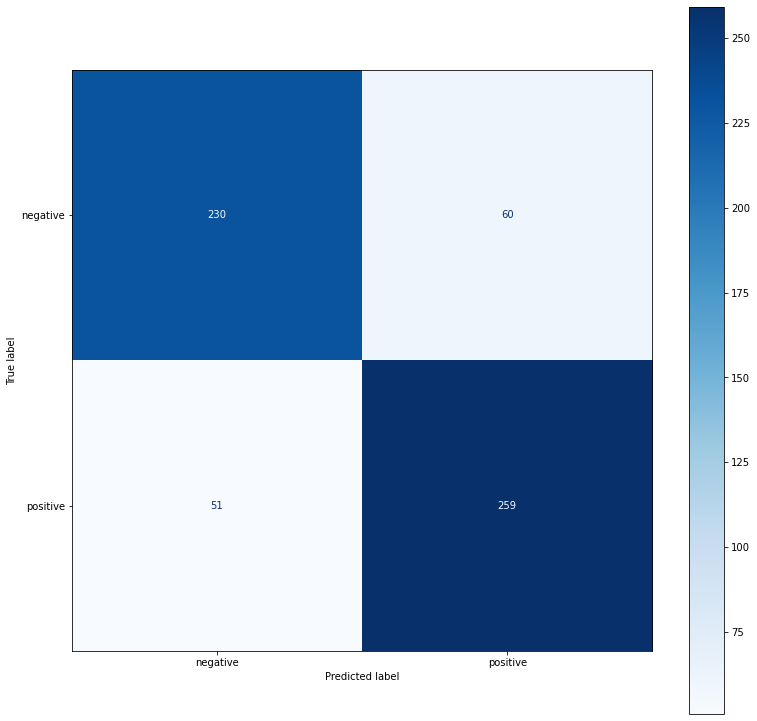

In [24]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

classes = ["negative", "positive"]
print(metrics.classification_report(y_test, y_pred, target_names=classes))

fig, ax = plt.subplots(figsize=(13,13))
plot_confusion_matrix(model, X_test, y_test, display_labels=classes, cmap=plt.cm.Blues, ax=ax)

In [16]:
#compute accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8183333333333334

2400

0    I loved the movie
Name: col1, dtype: object
